In [1]:
import numpy as np
import cv2
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

t_img = cv2.imread('/mnt/d/Research/perceptual-reflection-removal/dataset/reflection_layer/2.jpg',-1)
r_img = cv2.imread('/mnt/d/Research/perceptual-reflection-removal/dataset/transmission_layer/2.jpg',-1)
t_img = cv2.cvtColor(t_img, cv2.COLOR_BGR2RGB)
r_img = cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB)
t_img = cv2.resize(t_img, (224, 224))
r_img = cv2.resize(r_img, (224, 224))

kernel_sizes=[11]
low_sigma=2
high_sigma=5
low_gamma=1.3
high_gamma=1.3

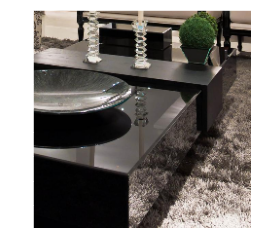

In [2]:
plt.imshow(t_img)

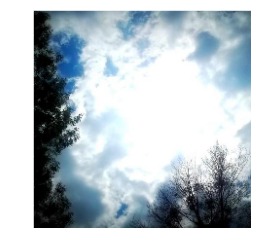

In [3]:
plt.imshow(r_img)

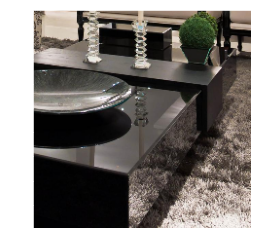

In [4]:
B_ = np.asarray(t_img, np.float32) / 255.
plt.imshow(B_)


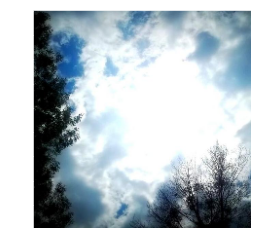

In [5]:
R_ = np.asarray(r_img, np.float32) / 255.
plt.imshow(R_)

In [6]:
kernel_size = np.random.choice(kernel_sizes)
print(kernel_size)

11


In [7]:
sigma = np.random.uniform(low_sigma, high_sigma)
print(sigma)

3.0048255056115085


In [8]:
gamma = np.random.uniform(low_gamma, high_gamma)
print(gamma)

1.3


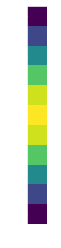

In [9]:
R_blur = R_
kernel = cv2.getGaussianKernel(11, sigma)
plt.imshow(kernel)

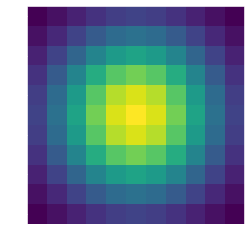

In [10]:
kernel2d = np.dot(kernel, kernel.T)
plt.imshow(kernel2d)

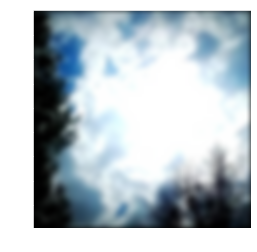

In [11]:
for i in range(3):
    R_blur[..., i] = convolve2d(R_blur[..., i], kernel2d, mode='same')
plt.imshow(R_blur)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


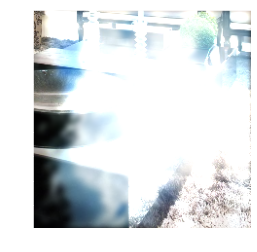

In [12]:
M_ = B_ + R_blur
plt.imshow(M_)

In [13]:
print(np.max(M_))

1.999903


In [14]:
# if np.max(M_) > 1:
m = M_[M_ > 1]
print(m)

[1.0061706 1.0360352 1.0211408 ... 1.0275177 1.0043948 1.0001807]


In [15]:
m = (np.mean(m) - 1) * gamma
print(m)

0.33806259632110597


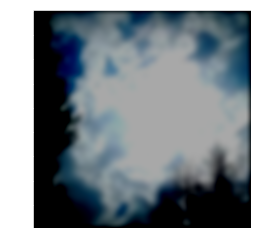

In [16]:
R_blur = np.clip(R_blur - m, 0, 1)
plt.imshow(R_blur)


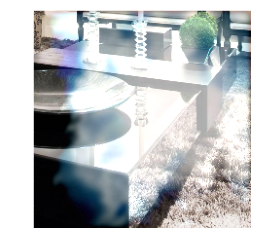

In [17]:
M_ = np.clip(R_blur + B_, 0, 1)
plt.imshow(M_)